## Exploration des données et visualisation                                                 

In [49]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re


sns.set_theme() 
#Lecture du fichier et l'affichage des première lignes
df= pd.read_csv(r"d:\Users\sbenabid\Desktop\code final_V2\reviews_trust.csv")
df.head(5)

,Commentaire,star,date,client,reponse,source,company,ville,maj,date_commande,ecart
0,"Bonjour , Ca doit faire 5 ans environ que je s...",1,2021-06-20 00:00:00+00:00,AUDREY Du 62,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
1,Vente lacoste article manquant photo prise sur...,1,2021-06-20 00:00:00+00:00,Nanasky De Verteuil,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
2,"Vente Lacoste Honteuse , article erroné , arti...",1,2021-06-19 00:00:00+00:00,Vanessa L,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
3,J'ai commandé des mules de la marque Moosefiel...,2,2021-06-19 00:00:00+00:00,Valery PERRAULT,"Bonjour , Je suis sincèrement navré d'apprendr...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
4,Commande téléphone etat A+ . Livraison d un vi...,1,2021-06-19 00:00:00+00:00,JULIE DRINGENBERG,"Bonjour Julie , Je suis sincèrement désolé de ...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN


In [50]:
#affichage de toutes les informations nécessaire pour le dataset
print(df.info(), end="\n\n")

print("Taille du DataFrame", df.shape, end='\n\n')

#print(df["Commentaire"].value_counts(normalize=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19863 entries, 0 to 19862
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Commentaire    19834 non-null  object 
 1   star           19863 non-null  int64  
 2   date           19488 non-null  object 
 3   client         10215 non-null  object 
 4   reponse        8477 non-null   object 
 5   source         19863 non-null  object 
 6   company        19863 non-null  object 
 7   ville          4860 non-null   object 
 8   maj            5 non-null      object 
 9   date_commande  6686 non-null   object 
 10  ecart          6686 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 1.7+ MB
None

Taille du DataFrame (19863, 11)



On remarque que nous avons 19863 entries et 11 colonnes en total chaque ligne contient des NaNs toutes les colonnes sont des objets sauf la colonne 'star' et 'ecart'.

# 1- Exploration des données

In [51]:
lignes_na = df.isna().any(axis = 1)
print("les lignes de df contiennent des NANs: ", lignes_na.sum())

les lignes de df contiennent des NANs:  19861


In [52]:
print("Il y a: ", df.duplicated().sum(), "doublons")
#Nous allons laisser les doublons.

Il y a:  427 doublons


In [53]:
#Voir le nombre d'observation non nulles par variable
df.count()

Commentaire      19834
star             19863
date             19488
client           10215
reponse           8477
source           19863
company          19863
ville             4860
maj                  5
date_commande     6686
ecart             6686
dtype: int64

In [54]:
correlation = df.corr()
correlation

,star,ecart
star,1.000000,-0.111769
ecart,-0.111769,1.000000


## Exploration des données numériques

<AxesSubplot:>

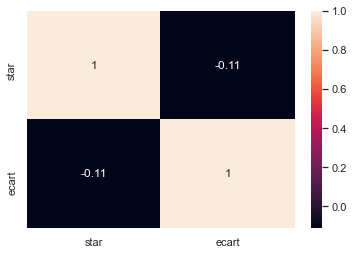

In [55]:
#la corrélation entre les variables numériques
correlation = df.corr()
sns.heatmap(correlation, annot=True)


In [56]:
#Vérifier la distribution des étoiles dans les commentaires NaNs
#Nous vaudrions prédire le nombre d'étoile, donc nous devons supprimer les commntaires vides
df[df['Commentaire'].isnull()]['star'].describe()

count    29.000000
mean      2.827586
std       1.774199
min       1.000000
25%       1.000000
50%       3.000000
75%       5.000000
max       5.000000
Name: star, dtype: float64

la moyenne: company
ShowRoom    3.756821
VeePee      1.480263
Name: star, dtype: float64
On remarque que il y a  plus d'avis sur Showroom que sur VeePee.


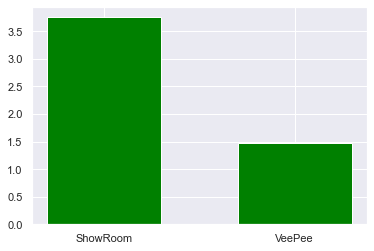

In [57]:
#Afficher la moyenne des étoiles par rapport aux companies
company_star_mean=df.groupby('company').mean()['star']
print("la moyenne:",company_star_mean)
plt.bar(company_star_mean.index,company_star_mean.values , color = 'green', width = 0.6);
print("On remarque que il y a  plus d'avis sur Showroom que sur VeePee.")

source
TrustPilot     1.408582
TrustedShop    4.147487
Name: star, dtype: float64
On remarque que TrustedShop a plus de commentaire positifs que TrustPilot.


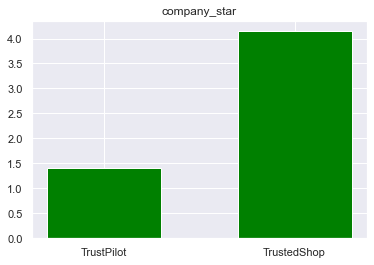

In [58]:
# la moyenne entre les étoiles et la source
source_star_mean=df.groupby('source').mean()['star']
print(source_star_mean)
plt.bar(source_star_mean.index,source_star_mean.values , color = 'green', width = 0.6);
plt.title('company_star');

print("On remarque que TrustedShop a plus de commentaire positifs que TrustPilot.")

On peut constater que les avis sur Veepee proviennent tous de TrustPilot et une grande partie des avis sur ShowRoom proviennent TrustedShop


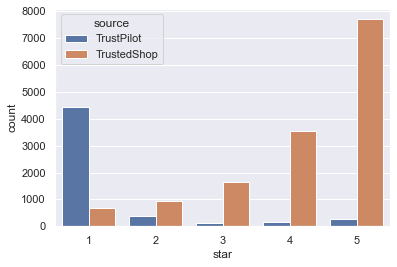

In [59]:
# le nmbre d'étoiles attribuées par les deux sources
sns.countplot(x="star",data=df, hue= 'source');
print("On peut constater que les avis sur Veepee proviennent tous de TrustPilot et une grande partie des avis sur ShowRoom proviennent TrustedShop")

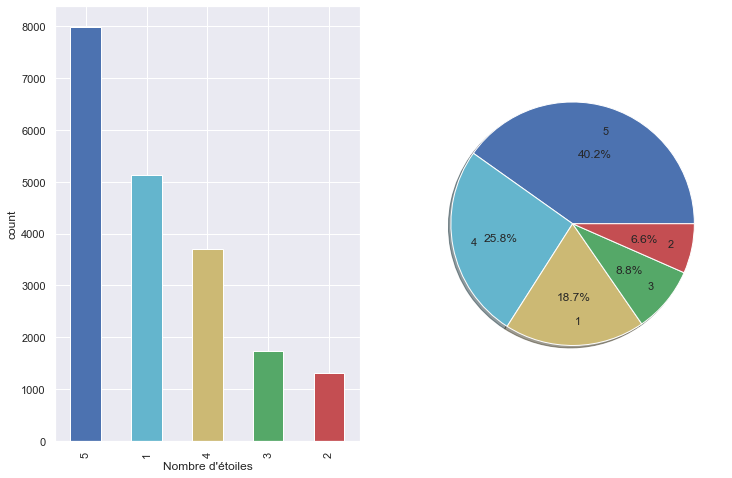

In [60]:
# la distribution des étoiles
x = [i for i in df.star.value_counts()]
y = [5,4,1,3,2]
#affichage de l'histogramme
plt.figure(figsize = (12,8))
plt.subplot(121)
df["star"].value_counts().plot.bar(color = ['b','c','y','g','r']);
plt.xlabel("Nombre d'étoiles")
plt.ylabel("count")
#affichage du cammanbert
plt.subplot(122)
plt.pie(x, labels = y ,colors=['b','c','y','g','r'], autopct = lambda x : str(round(x,1))+'%', 
        labeldistance = 0.8, shadow = True);


## Pourcentage des commentaires négatifs et positifs

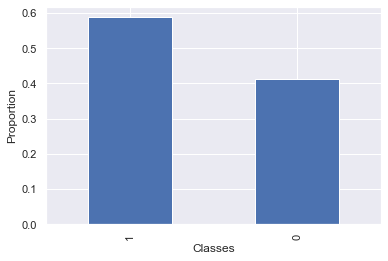

In [40]:
df = df[["Commentaire", "star"]]
# ajout de la colonne Sentiment à df
df["Sentiment"] = df["star"].apply(lambda x : np.where(x >=4 , 1 , 0))
#df.head(1)
#sns.countplot(df.Sentiment);
#df["Sentiment"].value_counts(normalize = True)
#ax=sns.barplot(x="Sentiment", data="df",y="Sentiment", estimator=lambda x: len(x)/len(df)*100)
#ax.set(xlabel="Sentiment", ylabel="Pourcentage", title="Pourcentage des sentiments sur les données")
#plt.show()



df.Sentiment.value_counts(normalize=True).plot.bar(color = 'b')
plt.xlabel("Classes")
plt.ylabel("Proportion")
plt.show()

Nous remarquons que le nombre de commentaires est élévé dans les mois 6/7/8 pour la compagnie Showroom.
Nous remarquons que le nombre de commentaires est presque le même pour la compagnie Veepee.


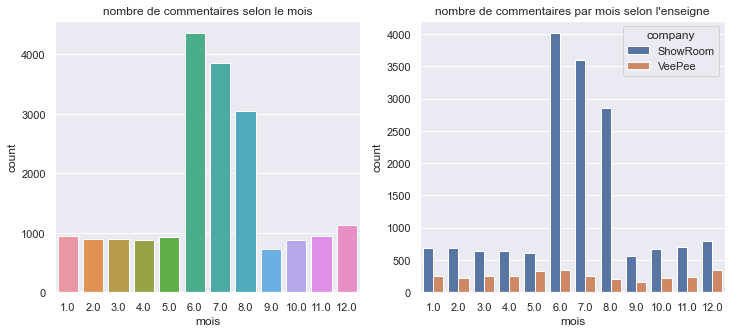

In [99]:
#Exploration de la variable date en rajoutant les colonnes "mois", "an" et voir l'impact de ces variables par rapport aux commentaires
# La seule "heure" fournie dans df étant 00h00 : découpage de df.date en df. annee/ mois / jour et suppression de df.annee

df["mois"] = df["date"].dt.month

plt.figure(figsize=(12,5))
plt.subplot(121)
sns.countplot(x="mois",data=df)
plt.title("nombre de commentaires selon le mois");
plt.subplot(122)
sns.countplot(x="mois",data=df, hue= 'company')
plt.title("nombre de commentaires par mois selon l'enseigne");

print("Nous remarquons que le nombre de commentaires est élévé dans les mois 6/7/8 pour la compagnie Showroom.")
print("Nous remarquons que le nombre de commentaires est presque le même pour la compagnie Veepee.")

# wordcloud

### Opération Text Mining: 
Dans cette partie nous allons garder toutes les colonnes pour faire le wordcloud.

In [67]:
#Suppression des valeurs manquantes de la colonne Commentaire
df = df.dropna(axis = 0, how = 'any', subset =["Commentaire"])
df.reset_index(inplace = True)
df = df.drop(['index'],axis = 1)
df.head(1)

,Commentaire,star,date,client,reponse,source,company,ville,maj,date_commande,ecart
0,"Bonjour , Ca doit faire 5 ans environ que je s...",1,2021-06-20 00:00:00+00:00,AUDREY Du 62,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN


In [68]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     d:\Users\sbenabid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [69]:
import re # 
#  Fusion de l'ensemble des commentaires dans un string
from nltk.tokenize.regexp import RegexpTokenizer
tokenizer = RegexpTokenizer("[a-zA-Zéèê]{3,}")
    
df["preprocessed"] = df["Commentaire"].apply(lambda x : " ".join(x.lower() for x in str(x).strip().split()))

# Déclaration des stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('french'))
stop_words.update (["!","?",".","_",":",",",";","-","--","...","'","...","'",',',',','…la','la','le','les','..','…','(',')','a+','+','etc…','qq','``',"j'","j '"])

# print(stop_words)

# Definition d'une fonction de filtrage de stopwords
def stopwords_filtering(chaine): # fonction renvoyant une liste ne contenant pas les stopwords
    tokens =[]
    chaine = tokenizer.tokenize(chaine)
    for mot in chaine :
        if mot not in stop_words :#conservation des mots non stopwords 
            tokens.append(mot)
    tokens = " ".join(tokens)
    return tokens
df["preprocessed"] = df["preprocessed"].apply(lambda x : stopwords_filtering(x))

In [70]:
commentaires_negatifs = " ".join(i.lower() for i in df.preprocessed[df["star"] < 3])
commentaires_positifs = " ".join(i.lower() for i in df.preprocessed[df["star"] >= 3])


In [71]:
from wordcloud import WordCloud
from PIL import Image


# wordcloud commentaires négatifs

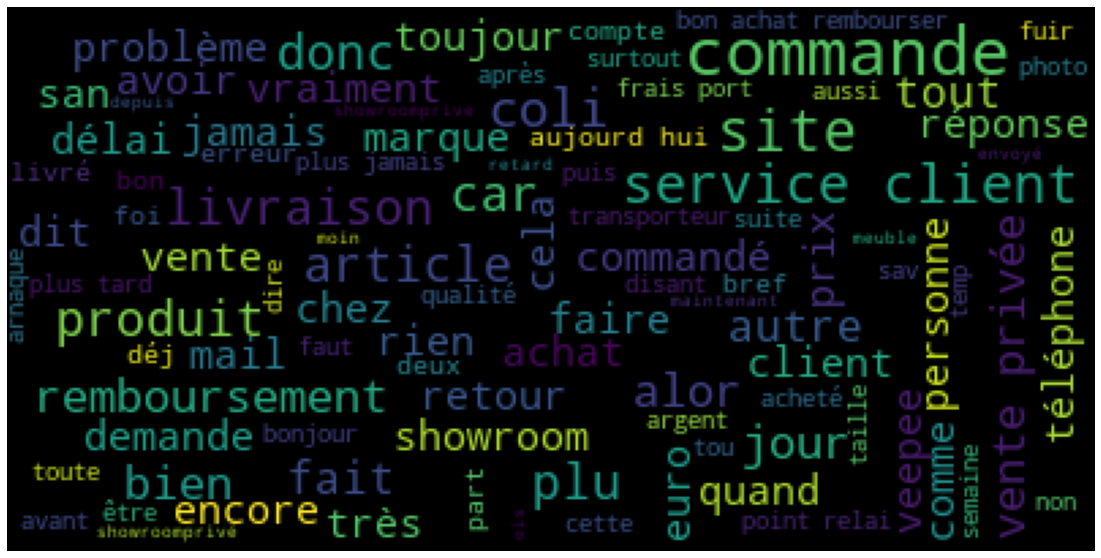

In [74]:
def plot_word_cloud(text) :
    # Définir un masque
    # mask_coloring = np.array(Image.open(str(masque)))
    # Définir le calque du nuage des mots
    wc = WordCloud(background_color= 'black', max_words= 100, stopwords= stop_words,max_font_size= 25,random_state=42)
    #wc = WordCloud(background_color=background_color, max_words=75, stopwords=stop_words, mask = mask_coloring, max_font_size=20, random_state=42)
    # Générer et afficher le nuage de mots
    plt.figure(figsize= (20,10))
    wc.generate(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

plot_word_cloud(commentaires_negatifs)


# wordcloud commentaires positifs

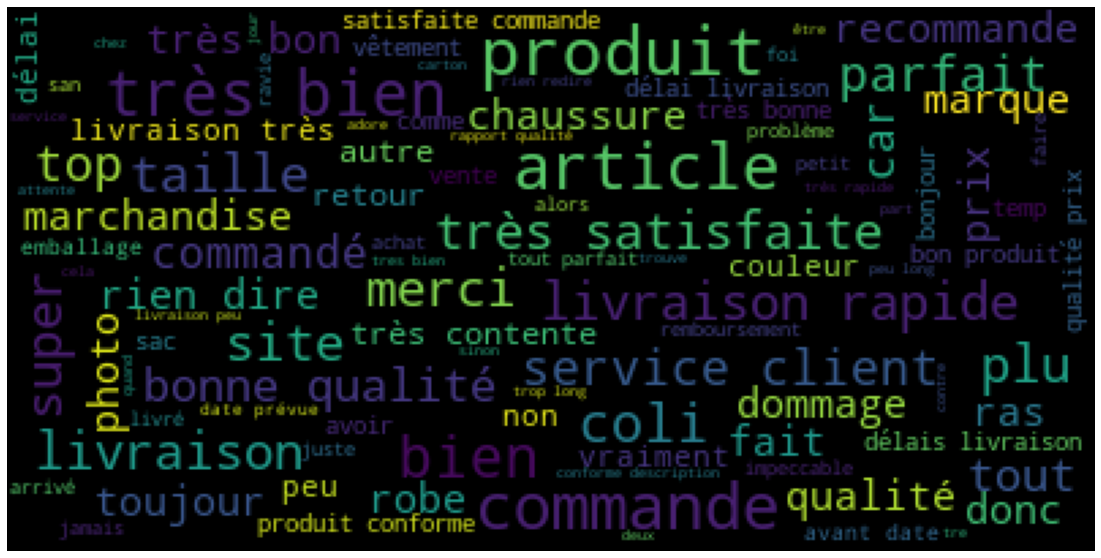

In [75]:
plot_word_cloud(commentaires_positifs)